In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
data.shape

(272, 2)

### Initialize your cluster centers

In [3]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    return:
        a numpy array with shape (k, num_feature)
    """
    # make sure you choose k clusters from the data itself,
    # or ensure otherwise that your initializations have the same scaling as the data.
    return data[np.random.choice(data.shape[0], k)]

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [4]:
def build_distance_matrix(data, mu):
    """build a distance matrix.
    input:
        data: original data with shape (num_sample, num_feature).
        a numpy array with shape (k, num_feature)
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    distance = np.sum(data**2, axis=1)[:, np.newaxis] + np.sum(mu**2, axis=1) - 2 * np.dot(data, mu.T)
    return distance

#### Update k-means parameters

In [5]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    distance = build_distance_matrix(data, mu_old)
    losses = np.min(distance, axis=1)
    assignments = np.argmin(distance, axis=1)
    mu = np.zeros(mu_old.shape)
    for k in range(mu.shape[0]):
        mu[k] = np.mean(data[assignments == k], axis=0)
    return losses, assignments, mu

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 355.7013990147061.


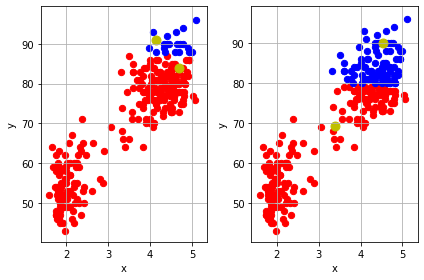

The current iteration of k-means is: 1,                the average loss is 120.52531869349002.


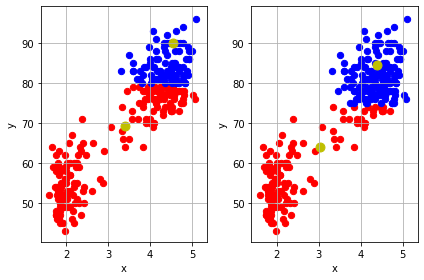

The current iteration of k-means is: 2,                the average loss is 66.09943233237539.


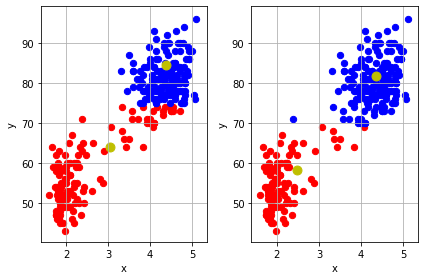

The current iteration of k-means is: 3,                the average loss is 38.08245757697676.


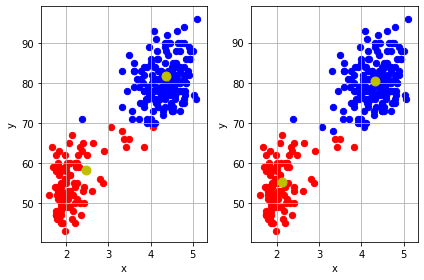

The current iteration of k-means is: 4,                the average loss is 32.81512971023894.


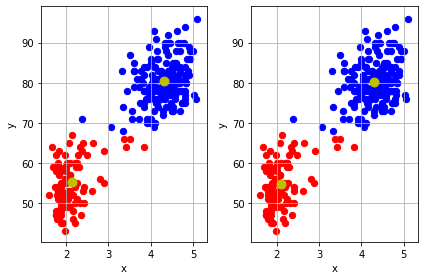

The current iteration of k-means is: 5,                the average loss is 32.72709088583542.


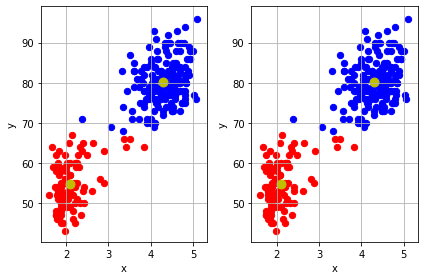

The current iteration of k-means is: 6,                the average loss is 32.72709088583542.


In [6]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [7]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [8]:
def preprocess_image(original_image):
    """preprocess the image."""
    # make pixel values of each color (which is a matrix) 
    # into a vector. **don't normalize!**
    processed_image = original_image.reshape((original_image.shape[0] * original_image.shape[1], 3))
    processed_image = processed_image.astype(float)
    return processed_image

processed_image = preprocess_image(original_image)
print(processed_image)

[[157. 146.  70.]
 [ 64.  52.  26.]
 [ 73.  47.  12.]
 ...
 [  6.  11.   8.]
 [  7.   8.   5.]
 [  7.   7.   5.]]


The current iteration of k-means is: 0,                the average loss is 3233.957482638889.
The current iteration of k-means is: 1,                the average loss is 2171.0081276846417.
The current iteration of k-means is: 2,                the average loss is 1947.5568229779644.
The current iteration of k-means is: 3,                the average loss is 1852.2038829422247.
The current iteration of k-means is: 4,                the average loss is 1786.280828844791.
The current iteration of k-means is: 5,                the average loss is 1735.873413685835.
The current iteration of k-means is: 6,                the average loss is 1701.6870145035416.
The current iteration of k-means is: 7,                the average loss is 1678.0202774216093.
The current iteration of k-means is: 8,                the average loss is 1661.5575270792351.
The current iteration of k-means is: 9,                the average loss is 1650.9166874612522.
The current iteration of k-means is: 10,             

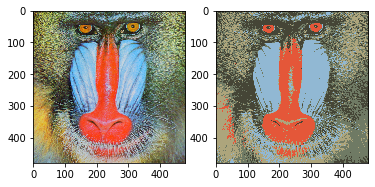

<Figure size 432x288 with 0 Axes>

In [9]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # use kmean to compress the image.
    mu_old = initialize_clusters(processed_image, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
            
        # update k-means information.
        mu_old = mu

    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)